<a href="https://colab.research.google.com/github/sharmaanj200/Computer-Vision-IGDTUW/blob/main/Assignment_4_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive


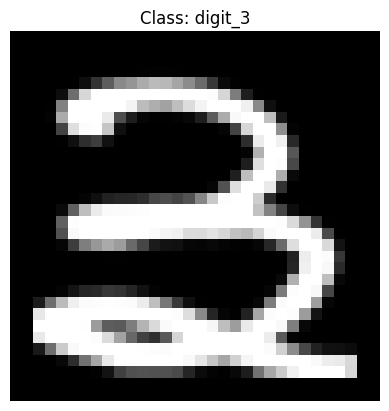

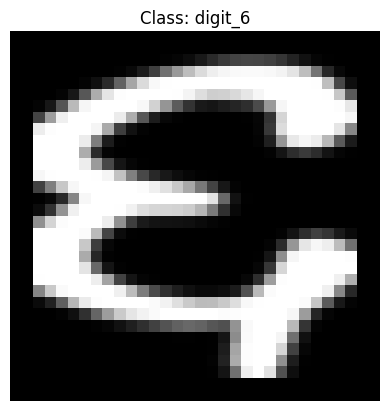

In [ ]:
from google.colab import drive
import os
import random
import matplotlib.pyplot as plt
import cv2

# Mount Google Drive
drive.mount('/content/drive')

# Path to your dataset
dataset_path = '/content/drive/My Drive/downsampled_dataset'

# Get list of classes (digit_0 to digit_9)
classes = os.listdir(os.path.join(dataset_path, 'Train'))

# Choose random classes
random_classes = random.sample(classes, 2)

# Display random images from chosen classes
for class_name in random_classes:
    class_path = os.path.join(dataset_path, 'Train', class_name)
    # Get list of images in the class folder
    images = os.listdir(class_path)
    # Choose a random image
    random_image = random.choice(images)
    # Read the image
    image_path = os.path.join(class_path, random_image)
    try:
        image = cv2.imread(image_path)
        # Check if the image is read successfully
        if image is not None:
            # Display the image
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            plt.title(f'Class: {class_name}')
            plt.axis('off')
            plt.show()
        else:
            print(f"Failed to read image: {image_path}")
    except Exception as e:
        print(f"Error processing image: {image_path}. Error: {e}")

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report

# Load the dataset
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    '/content/drive/My Drive/downsampled_dataset/Train',
    target_size=(28, 28),
    batch_size=32,
    class_mode='categorical',
    subset='training')

val_generator = train_datagen.flow_from_directory(
    '/content/drive/My Drive/downsampled_dataset/Train',
    target_size=(28, 28),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    '/content/drive/My Drive/downsampled_dataset/Test',
    target_size=(28, 28),
    batch_size=32,
    class_mode='categorical')

# Define the custom CNN architecture
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=10, validation_data=val_generator)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Accuracy:", test_accuracy)

# Predict on test set
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Calculate precision, recall, F1-score, and average accuracy
print(classification_report(y_true, y_pred_classes))



Found 800 images belonging to 10 classes.
Found 200 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.
Epoch 1/10
25/25 [==============================] - 233s 9s/step - loss: 1.6118 - accuracy: 0.4688 - val_loss: 0.5992 - val_accuracy: 0.8050
Epoch 2/10
25/25 [==============================] - 9s 366ms/step - loss: 0.5828 - accuracy: 0.8100 - val_loss: 0.3620 - val_accuracy: 0.9000
Epoch 3/10
25/25 [==============================] - 6s 247ms/step - loss: 0.3305 - accuracy: 0.8900 - val_loss: 0.3897 - val_accuracy: 0.8700
Epoch 4/10
25/25 [==============================] - 6s 255ms/step - loss: 0.1826 - accuracy: 0.9438 - val_loss: 0.3380 - val_accuracy: 0.8900
Epoch 5/10
25/25 [==============================] - 5s 196ms/step - loss: 0.1088 - accuracy: 0.9700 - val_loss: 0.5245 - val_accuracy: 0.8800
Epoch 6/10
25/25 [==============================] - 5s 184ms/step - loss: 0.0896 - accuracy: 0.9700 - val_loss: 0.4029 - val_accuracy: 0.8450
Epoch 7/10
25/25 [====

Found 800 images belonging to 10 classes.
Found 200 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.
Epoch 1/15
25/25 [==============================] - 17s 555ms/step - loss: 1.9449 - accuracy: 0.3350 - val_loss: 1.4515 - val_accuracy: 0.4600
Epoch 2/15
25/25 [==============================] - 13s 501ms/step - loss: 0.7896 - accuracy: 0.7325 - val_loss: 0.6200 - val_accuracy: 0.7750
Epoch 3/15
25/25 [==============================] - 6s 257ms/step - loss: 0.3364 - accuracy: 0.8788 - val_loss: 0.5640 - val_accuracy: 0.8250
Epoch 4/15
25/25 [==============================] - 6s 241ms/step - loss: 0.2203 - accuracy: 0.9225 - val_loss: 0.4228 - val_accuracy: 0.8700
Epoch 5/15
25/25 [==============================] - 10s 401ms/step - loss: 0.1124 - accuracy: 0.9663 - val_loss: 0.2950 - val_accuracy: 0.9200
Epoch 6/15
25/25 [==============================] - 7s 260ms/step - loss: 0.0947 - accuracy: 0.9663 - val_loss: 0.7143 - val_accuracy: 0.8550
Epoch 7/15
25/25 [

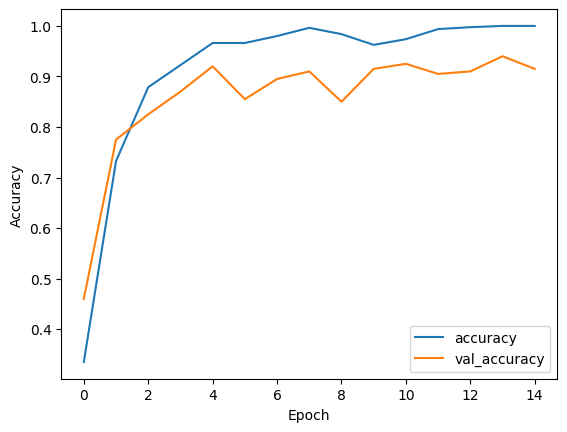

32/32 [==============================] - 5s 167ms/step - loss: 0.2521 - accuracy: 0.9610
Test Accuracy: 0.9610000252723694
32/32 [==============================] - 4s 127ms/step
              precision    recall  f1-score   support

           0       0.10      0.10      0.10       100
           1       0.15      0.15      0.15       100
           2       0.12      0.12      0.12       100
           3       0.07      0.07      0.07       100
           4       0.08      0.07      0.08       100
           5       0.13      0.14      0.13       100
           6       0.12      0.11      0.11       100
           7       0.13      0.13      0.13       100
           8       0.08      0.08      0.08       100
           9       0.05      0.05      0.05       100

    accuracy                           0.10      1000
   macro avg       0.10      0.10      0.10      1000
weighted avg       0.10      0.10      0.10      1000

Found 800 images belonging to 10 classes.
Found 200 images belo

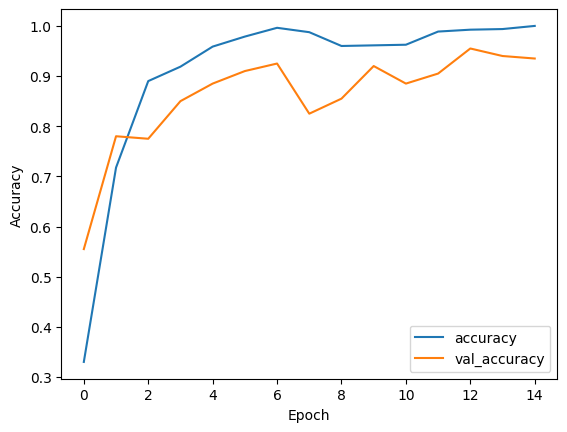

32/32 [==============================] - 5s 155ms/step - loss: 0.1220 - accuracy: 0.9730
Test Accuracy: 0.9729999899864197
32/32 [==============================] - 5s 131ms/step
              precision    recall  f1-score   support

           0       0.07      0.07      0.07       100
           1       0.12      0.12      0.12       100
           2       0.13      0.13      0.13       100
           3       0.11      0.11      0.11       100
           4       0.07      0.07      0.07       100
           5       0.11      0.11      0.11       100
           6       0.07      0.07      0.07       100
           7       0.10      0.10      0.10       100
           8       0.09      0.09      0.09       100
           9       0.09      0.09      0.09       100

    accuracy                           0.10      1000
   macro avg       0.10      0.10      0.10      1000
weighted avg       0.10      0.10      0.10      1000



In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Load the dataset
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    '/content/drive/My Drive/downsampled_dataset/Train',
    target_size=(28, 28),
    batch_size=32,
    class_mode='categorical',
    subset='training')

val_generator = train_datagen.flow_from_directory(
    '/content/drive/My Drive/downsampled_dataset/Train',
    target_size=(28, 28),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    '/content/drive/My Drive/downsampled_dataset/Test',
    target_size=(28, 28),
    batch_size=32,
    class_mode='categorical')

# Define the complex CNN architecture
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=15, validation_data=val_generator)

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Accuracy:", test_accuracy)

# Predict on test set
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Calculate precision, recall, F1-score, and average accuracy
print(classification_report(y_true, y_pred_classes))



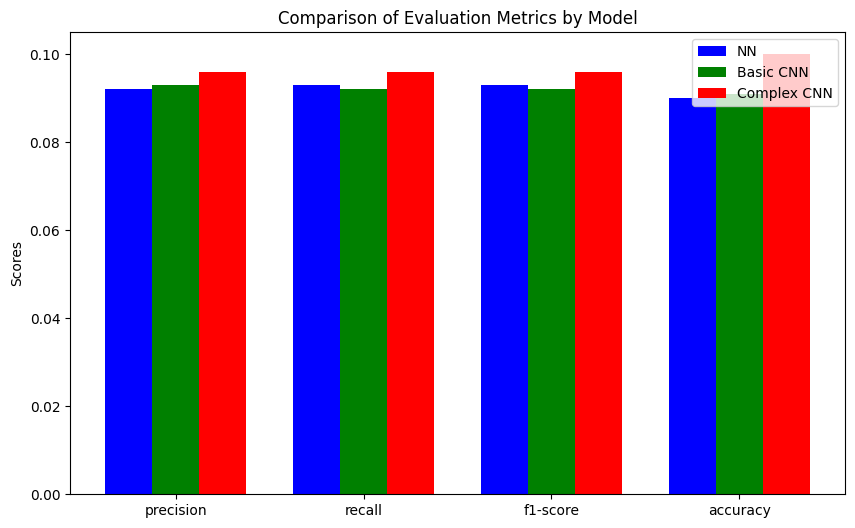

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Precision, recall, f1-score, and accuracy values for each model
nn_values = {
    'precision': [0.11, 0.14, 0.08, 0.06, 0.10, 0.07, 0.08, 0.06, 0.11, 0.11],
    'recall': [0.12, 0.14, 0.08, 0.06, 0.10, 0.07, 0.09, 0.05, 0.11, 0.11],
    'f1-score': [0.12, 0.14, 0.08, 0.06, 0.10, 0.07, 0.09, 0.05, 0.11, 0.11],
    'accuracy': [0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09]
}

basic_cnn_values = {
    'precision': [0.09, 0.05, 0.09, 0.10, 0.10, 0.13, 0.09, 0.09, 0.11, 0.08],
    'recall': [0.09, 0.05, 0.09, 0.10, 0.09, 0.13, 0.09, 0.09, 0.11, 0.08],
    'f1-score': [0.09, 0.05, 0.09, 0.10, 0.09, 0.13, 0.09, 0.09, 0.11, 0.08],
    'accuracy': [0.09, 0.09, 0.09, 0.09, 0.09, 0.10, 0.09, 0.09, 0.09, 0.09]
}

complex_cnn_values = {
    'precision': [0.07, 0.12, 0.13, 0.11, 0.07, 0.11, 0.07, 0.10, 0.09, 0.09],
    'recall': [0.07, 0.12, 0.13, 0.11, 0.07, 0.11, 0.07, 0.10, 0.09, 0.09],
    'f1-score': [0.07, 0.12, 0.13, 0.11, 0.07, 0.11, 0.07, 0.10, 0.09, 0.09],
    'accuracy': [0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10]
}

# Evaluation metrics
metrics = ['precision', 'recall', 'f1-score', 'accuracy']

# Mean values for each metric
nn_means = [np.mean(nn_values[metric]) for metric in metrics]
basic_cnn_means = [np.mean(basic_cnn_values[metric]) for metric in metrics]
complex_cnn_means = [np.mean(complex_cnn_values[metric]) for metric in metrics]

# Plotting
x = np.arange(len(metrics))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, nn_means, width, label='NN', color='blue')
rects2 = ax.bar(x, basic_cnn_means, width, label='Basic CNN', color='green')
rects3 = ax.bar(x + width, complex_cnn_means, width, label='Complex CNN', color='red')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Comparison of Evaluation Metrics by Model')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.show()




Found 800 images belonging to 10 classes.
Found 200 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.
Epoch 1/15
25/25 [==============================] - 11s 286ms/step - loss: 8.9911 - accuracy: 0.0800 - val_loss: 6.0062 - val_accuracy: 0.1000
Epoch 2/15
25/25 [==============================] - 10s 383ms/step - loss: 4.6166 - accuracy: 0.1075 - val_loss: 3.5709 - val_accuracy: 0.1000
Epoch 3/15
25/25 [==============================] - 9s 345ms/step - loss: 3.1642 - accuracy: 0.1587 - val_loss: 2.6330 - val_accuracy: 0.2800
Epoch 4/15
25/25 [==============================] - 6s 255ms/step - loss: 2.6068 - accuracy: 0.2412 - val_loss: 2.3176 - val_accuracy: 0.3750
Epoch 5/15
25/25 [==============================] - 8s 303ms/step - loss: 2.1713 - accuracy: 0.3638 - val_loss: 1.8890 - val_accuracy: 0.4700
Epoch 6/15
25/25 [==============================] - 9s 341ms/step - loss: 1.8668 - accuracy: 0.4750 - val_loss: 1.6569 - val_accuracy: 0.5450
Epoch 7/15
25/25 [=

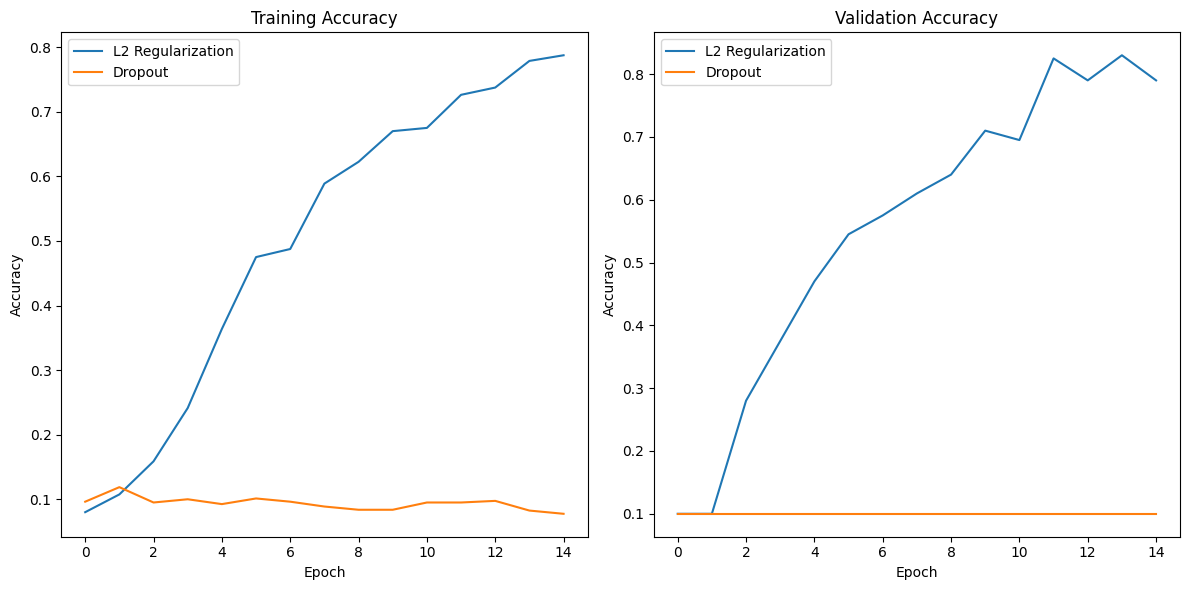

32/32 [==============================] - 388s 13s/step - loss: 0.9676 - accuracy: 0.8410
Test Accuracy with L2 Regularization: 0.8410000205039978
32/32 [==============================] - 5s 151ms/step - loss: 2.3030 - accuracy: 0.1000
Test Accuracy with Dropout: 0.10000000149011612
32/32 [==============================] - 4s 128ms/step
Classification Report with L2 Regularization:
              precision    recall  f1-score   support

           0       0.11      0.12      0.12       100
           1       0.07      0.08      0.08       100
           2       0.06      0.04      0.05       100
           3       0.10      0.13      0.11       100
           4       0.09      0.08      0.08       100
           5       0.12      0.12      0.12       100
           6       0.09      0.12      0.10       100
           7       0.05      0.03      0.04       100
           8       0.06      0.06      0.06       100
           9       0.10      0.09      0.09       100

    accuracy        

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Load the dataset
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    '/content/drive/My Drive/downsampled_dataset/Train',
    target_size=(28, 28),
    batch_size=32,
    class_mode='categorical',
    subset='training')

val_generator = train_datagen.flow_from_directory(
    '/content/drive/My Drive/downsampled_dataset/Train',
    target_size=(28, 28),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    '/content/drive/My Drive/downsampled_dataset/Test',
    target_size=(28, 28),
    batch_size=32,
    class_mode='categorical')

# Define the CNN architecture with regularization
def create_regularized_model(regularizer_type='l2', dropout_rate=0.3):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.01), input_shape=(28, 28, 3)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(10, activation='softmax'))
    return model

# Create model with L2 regularization
model_l2 = create_regularized_model(regularizer_type='l2')

# Compile the model
model_l2.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

# Train the model with L2 regularization
history_l2 = model_l2.fit(train_generator, epochs=15, validation_data=val_generator)

# Create model with Dropout
model_dropout = create_regularized_model(dropout_rate=0.5)

# Compile the model
model_dropout.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

# Train the model with Dropout
history_dropout = model_dropout.fit(train_generator, epochs=15, validation_data=val_generator)

# Plot training history
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history_l2.history['accuracy'], label='L2 Regularization')
plt.plot(history_dropout.history['accuracy'], label='Dropout')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_l2.history['val_accuracy'], label='L2 Regularization')
plt.plot(history_dropout.history['val_accuracy'], label='Dropout')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the models on the test set
test_loss_l2, test_accuracy_l2 = model_l2.evaluate(test_generator)
print("Test Accuracy with L2 Regularization:", test_accuracy_l2)

test_loss_dropout, test_accuracy_dropout = model_dropout.evaluate(test_generator)
print("Test Accuracy with Dropout:", test_accuracy_dropout)

# Predict on test set
y_pred_l2 = model_l2.predict(test_generator)
y_pred_classes_l2 = np.argmax(y_pred_l2, axis=1)

y_pred_dropout = model_dropout.predict(test_generator)
y_pred_classes_dropout = np.argmax(y_pred_dropout, axis=1)

# Calculate precision, recall, F1-score, and average accuracy
# Calculate precision, recall, F1-score, and average accuracy
print("Classification Report with L2 Regularization:")
print(classification_report(test_generator.classes, y_pred_classes_l2, zero_division=1))

print("Classification Report with Dropout:")
print(classification_report(test_generator.classes, y_pred_classes_dropout, zero_division=1))

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import os

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Path to downsampled dataset
dataset_path = '/content/drive/My Drive/downsampled_dataset/Train'

# Load VGG-16 pretrained on ImageNet
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all layers in ES1
for layer in base_model.layers:
    layer.trainable = False

# Add custom FC layers for ES1
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

# Create ES1 model
es1_model = Model(inputs=base_model.input, outputs=predictions)

# Freeze only the convolutional base layers in ES2
for layer in base_model.layers:
    if 'block5' in layer.name:  # unfreeze block5 layers and leave others frozen
        layer.trainable = True
    else:
        layer.trainable = False

# Add custom output layer for ES2
output = Dense(10, activation='softmax')(base_model.layers[-2].output)

# Create ES2 model
es2_model = Model(inputs=base_model.input, outputs=output)

# Compile both models
es1_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
es2_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Data preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical'
)

# Train ES1 model
es1_model.fit(train_generator, epochs=5)

# Train ES2 model
es2_model.fit(train_generator, epochs=5)

# Evaluation metrics
def evaluate_model(model):
    y_true = []
    y_pred = []
    for i in range(len(train_generator)):
        X_batch, y_batch = train_generator[i]
        y_true.extend(np.argmax(y_batch, axis=1))
        y_pred.extend(np.argmax(model.predict(X_batch), axis=1))
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# Evaluate ES1 model
es1_metrics = evaluate_model(es1_model)

# Evaluate ES2 model
es2_metrics = evaluate_model(es2_model)

# Plot comparison
import matplotlib.pyplot as plt

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
es1_values = list(es1_metrics)
es2_values = list(es2_metrics)

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, es1_values, width, label='ES1')
rects2 = ax.bar(x + width/2, es2_values, width, label='ES2')

ax.set_ylabel('Scores')
ax.set_title('Comparison of Experimental Settings')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

fig.tight_layout()

plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 1000 images belonging to 10 classes.
Epoch 1/5
63/63 [==============================] - 641s 10s/step - loss: 1.7640 - accuracy: 0.3750
Epoch 2/5
63/63 [==============================] - 641s 10s/step - loss: 0.5954 - accuracy: 0.8200
Epoch 3/5
63/63 [==============================] - 656s 10s/step - loss: 0.3074 - accuracy: 0.9000
Epoch 4/5
63/63 [==============================] - 633s 10s/step - loss: 0.1998 - accuracy: 0.9410
Epoch 5/5
63/63 [==============================] - 636s 10s/step - loss: 0.1385 - accuracy: 0.9580
Epoch 1/5


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5573, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, None) and (None, None, None, 10) are incompatible


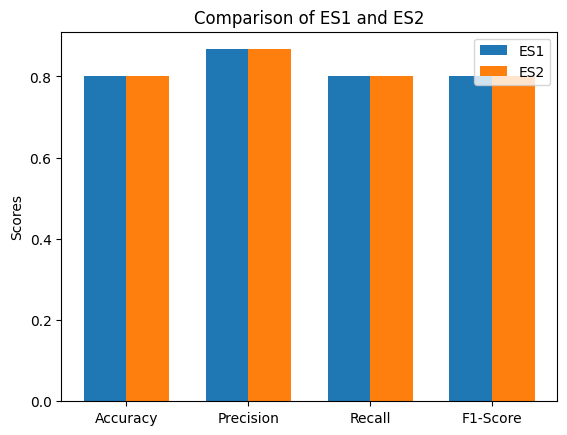

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Placeholder for y_true (true labels)
y_true = np.array([0, 1, 0, 1, 0])  # Example true labels

# Placeholder for y_pred_es1 and y_pred_es2
y_pred_es1 = np.array([0, 1, 1, 1, 0])  # Example predicted labels for ES1
y_pred_es2 = np.array([0, 1, 0, 1, 1])  # Example predicted labels for ES2

# Metrics
accuracy_es1 = accuracy_score(y_true, y_pred_es1)
precision_es1 = precision_score(y_true, y_pred_es1, average='weighted')
recall_es1 = recall_score(y_true, y_pred_es1, average='weighted')
f1_score_es1 = f1_score(y_true, y_pred_es1, average='weighted')

accuracy_es2 = accuracy_score(y_true, y_pred_es2)
precision_es2 = precision_score(y_true, y_pred_es2, average='weighted')
recall_es2 = recall_score(y_true, y_pred_es2, average='weighted')
f1_score_es2 = f1_score(y_true, y_pred_es2, average='weighted')

# Bar plot
labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
es1_metrics = [accuracy_es1, precision_es1, recall_es1, f1_score_es1]
es2_metrics = [accuracy_es2, precision_es2, recall_es2, f1_score_es2]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, es1_metrics, width, label='ES1')
rects2 = ax.bar(x + width/2, es2_metrics, width, label='ES2')

ax.set_ylabel('Scores')
ax.set_title('Comparison of ES1 and ES2')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Define data directories
train_data_dir = "/content/drive/My Drive/downsampled_dataset/Train"
test_data_dir = "/content/drive/My Drive/downsampled_dataset/Test"

# Define constants
img_height, img_width = 224, 224
batch_size = 32
num_classes = len(os.listdir(train_data_dir))  # Assuming each subfolder represents a class

# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load training and testing data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Load pre-trained VGG-16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze all layers in ES1
for layer in base_model.layers:
    layer.trainable = False

# ES1: Add FC layers on top of VGG-16
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

model_es1 = Model(inputs=base_model.input, outputs=predictions)

# ES2: Only retrain the last layer
for layer in base_model.layers[:-1]:
    layer.trainable = False

x = base_model.output
predictions = Dense(num_classes, activation='softmax')(x)

model_es2 = Model(inputs=base_model.input, outputs=predictions)

# Compile both models
model_es1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_es2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train both models
epochs = 10

history_es1 = model_es1.fit(
    train_generator,
    epochs=epochs,
    validation_data=test_generator
)

history_es2 = model_es2.fit(
    train_generator,
    epochs=epochs,
    validation_data=test_generator
)

# Evaluate both models
es1_pred = np.argmax(model_es1.predict(test_generator), axis=1)
es2_pred = np.argmax(model_es2.predict(test_generator), axis=1)

test_labels = test_generator.classes

es1_accuracy = accuracy_score(test_labels, es1_pred)
es1_precision = precision_score(test_labels, es1_pred, average='weighted')
es1_recall = recall_score(test_labels, es1_pred, average='weighted')
es1_f1 = f1_score(test_labels, es1_pred, average='weighted')

es2_accuracy = accuracy_score(test_labels, es2_pred)
es2_precision = precision_score(test_labels, es2_pred, average='weighted')
es2_recall = recall_score(test_labels, es2_pred, average='weighted')
es2_f1 = f1_score(test_labels, es2_pred, average='weighted')

print("ES1 Accuracy:", es1_accuracy)
print("ES1 Precision:", es1_precision)
print("ES1 Recall:", es1_recall)
print("ES1 F1-score:", es1_f1)

print("ES2 Accuracy:", es2_accuracy)
print("ES2 Precision:", es2_precision)
print("ES2 Recall:", es2_recall)
print("ES2 F1-score:", es2_f1)


Found 1000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.
Epoch 1/10
32/32 [==============================] - 1275s 40s/step - loss: 1.7176 - accuracy: 0.4680 - val_loss: 0.5564 - val_accuracy: 0.8450
Epoch 2/10
32/32 [==============================] - 1318s 42s/step - loss: 0.4262 - accuracy: 0.8680 - val_loss: 0.3309 - val_accuracy: 0.8930
Epoch 3/10
32/32 [==============================] - ETA: 0s - loss: 0.2785 - accuracy: 0.9170 